In [103]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)


df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
import pandas as pd

df2 = dataframes['df1']

df3 = df2.drop(df2[(df2['Day'] < 2) | (df2['Day'] > 6)].index)
# x = df3['Time'].dt.hour

# df3['Dates'] = pd.to_datetime(df3['Time']).dt.date
# df3['Time'] = pd.to_datetime(df3['Time']).dt.time

df4 = df3.drop(['Day', 'Light', 'Dates'], axis=1)

days = df4.groupby('Time').mean()

mean_days = days.mean(axis=1)

mean_days

# x

KeyError: "['Dates'] not found in axis"

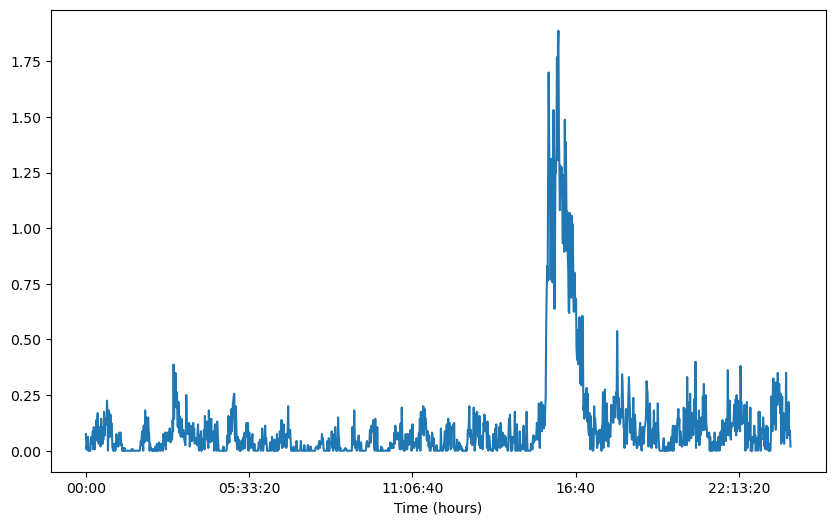

In [107]:
# import pandas as pd

# # Assuming dataframes is a dictionary containing your DataFrame
# # Initialize DataFrame df2
# df2 = dataframes['df1']

# # Drop rows where 'Day' column value is less than 2 or greater than 6
# df3 = df2.drop(df2[(df2['Day'] < 2) | (df2['Day'] > 6)].index)

# # Group by 'Time' and calculate mean
# days = df3.groupby('Time').mean()

# # Drop 'Day' and 'Light' columns
# days = days.drop(['Day', 'Light'], axis=1)


import matplotlib.pyplot as plt
import numpy as np


# Assuming mean_days is already calculated
mean_days.plot(figsize=(10, 6))  # Corrected figsize

# Set x-axis ticks and labels
# Set x-axis label
plt.xlabel('Time (hours)')

# Display the plot
plt.show()



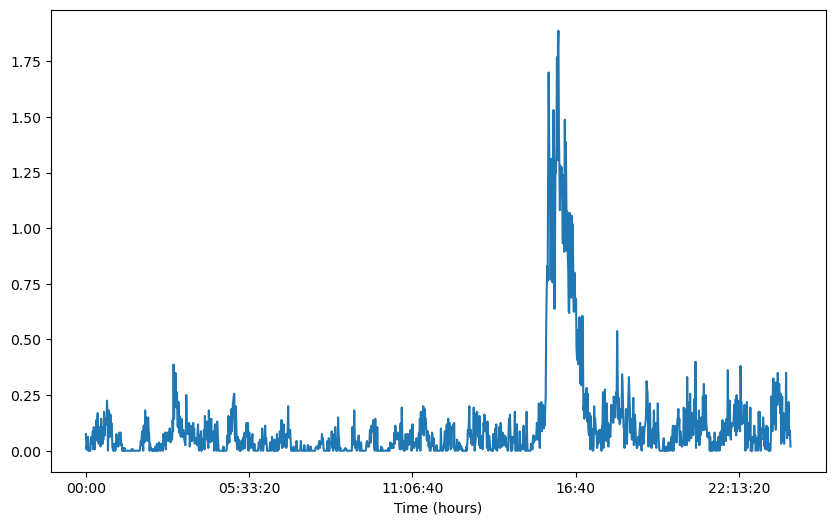

In [109]:

import matplotlib.pyplot as plt
import numpy as np

mean_days.plot(figsize=(10, 6))  
plt.xlabel('Time (hours)')

# Display the plot
plt.show()

In [111]:
# import pandas as pd

# # Sample DataFrame
# data = {
#     'A': [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]}
# df = pd.DataFrame(data)

# # Display the DataFrame
# print("Original DataFrame:")
# print(df)

# # Find zeros followed by ones
# def find_zeros_followed_by_ones(column):
#     zero_followed_by_one = (column == 0) & (column.shift(-1) == 1)
#     return zero_followed_by_one

# # Apply the function to each column
# result = df.apply(find_zeros_followed_by_ones)

# # Display the results
# print("\nZeros followed by ones (True indicates zero followed by one):")
# print(result)

# # To get the actual values where condition is met
# filtered_df = df[result]

# print("\nFiltered DataFrame (only zeros followed by ones):")
# print(filtered_df)


In [113]:
df3

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
644,2,2024-01-19 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,2,2024-01-19 00:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,2,2024-01-19 00:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,2,2024-01-19 00:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,2,2024-01-19 00:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,6,2024-01-23 23:55:00,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7840,6,2024-01-23 23:56:00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7841,6,2024-01-23 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
#trying to find zeitgeber time by finding the zeroes followed by ones
def find_zeros_followed_by_ones(column):
    zero_followed_by_one = (column == 0) & (column.shift(-1) == 1)
    return zero_followed_by_one
    
def find_ones_followed_by_zeroes(column):
    one_followed_by_zero = (column == 1) & (column.shift(-1) == 0)
    return one_followed_by_zero
    
light_column = df3['Light']

O_followedby_l = find_zeros_followed_by_ones(light_column)
df3['Light2'] = O_followedby_l
df3['Light2'].replace('True', 'Start', inplace=True)

l_followedby_O = find_ones_followed_by_zeroes(light_column)
O_followedby_l
l_followedby_O

display(df3)


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2
Index,,,,,,,,,,,,,,,,,,,,,
644,2,2024-01-19 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
645,2,2024-01-19 00:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
646,2,2024-01-19 00:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
647,2,2024-01-19 00:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
648,2,2024-01-19 00:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,6,2024-01-23 23:55:00,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,False
7840,6,2024-01-23 23:56:00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,False
7841,6,2024-01-23 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [125]:
difference = np.diff(light_column)
df3['Light2'] = np.append(difference, np.nan)
display(df3)
start = df3.loc[df3.Light2 == -1].index[1]
stop = df3.loc[df3.Light2 == 1].index[1]
length_data = start - stop
length_data

,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32,Light2
Index,,,,,,,,,,,,,,,,,,,,,
644,2,2024-01-19 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
645,2,2024-01-19 00:01:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
646,2,2024-01-19 00:02:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
647,2,2024-01-19 00:03:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
648,2,2024-01-19 00:04:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,6,2024-01-23 23:55:00,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7840,6,2024-01-23 23:56:00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7841,6,2024-01-23 23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


721

In [166]:
filering_spiders = df3.filter(like="Sp")
meanmov_spiders = filering_spiders.mean(axis=1)  
meanmov_spiders1 = meanmov_spiders[(721-644):]
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

import pprint
pprint.pprint(list(chunks(meanmov_spiders1, 721)))

[Index
721     0.00000
722     0.00000
723     0.00000
724     0.00000
725     0.00000
         ...   
1437    0.15625
1438    0.00000
1439    0.06250
1440    0.00000
1441    0.25000
Length: 721, dtype: float64,
 Index
1442    0.37500
1443    0.03125
1444    0.00000
1445    0.00000
1446    0.00000
         ...   
2158    0.00000
2159    0.00000
2160    0.00000
2161    0.00000
2162    0.00000
Length: 721, dtype: float64,
 Index
2163    0.0625
2164    0.0000
2165    0.0000
2166    0.0000
2167    0.0000
         ...  
2879    0.0000
2880    0.0000
2881    0.0000
2882    0.0000
2883    0.0000
Length: 721, dtype: float64,
 Index
2884    0.0
2885    0.0
2886    0.0
2887    0.0
2888    0.0
       ... 
3600    0.0
3601    0.0
3602    0.0
3603    0.0
3604    0.0
Length: 721, dtype: float64,
 Index
3605    0.00000
3606    0.00000
3607    0.00000
3608    0.00000
3609    0.00000
         ...   
4321    0.50000
4322    0.09375
4323    0.43750
4324    0.31250
4325    0.31250
Length: 721, dtype: floa